In [131]:
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

# Part 1 - Data Cleaning

## Data Loading
We load the data, provided in `hw2-crowd-data.csv`

In [132]:
# URL of the raw CSV file on GitHub
github_csv_url = "https://raw.githubusercontent.com/CMU-IDS-Spring-2024/hw2-exploratory-data-analysis-margarel/main/hw2-crowd-data.csv"

df_cars = pd.read_csv(github_csv_url)

## Data Cleaning
You need to clean the rows and columns of data using Pandas.  Insert the code (and descriptions of the code in markdown) in this subsection.

A car VIN (Vehicle Identification Number) is a unique code that is assigned to each vehicle by the manufacturer. Essentially, it serves as a fingerprint to determine whether or not it is a real car. Therefore, if the entry does not contain a VIN of 17 characters, the entry is most likely inaccurate.

In [133]:
# Checking whether or not there are entries without a VIN

df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car Make              458 non-null    object 
 1   Car Model             457 non-null    object 
 2   Dealer or Individual  453 non-null    object 
 3   Price                 456 non-null    float64
 4   Year                  458 non-null    int64  
 5   Location              446 non-null    object 
 6   Mileage               449 non-null    float64
 7   Doors                 440 non-null    object 
 8   Color                 454 non-null    object 
 9   Transmission          455 non-null    object 
 10  VIN#                  452 non-null    object 
 11  Engine                444 non-null    object 
 12  Description           355 non-null    object 
 13  Web link              457 non-null    object 
 14  Screenshot            435 non-null    object 
dtypes: float64(2), int64(1)

Checking to see if there are entries that can be removed due to lack of information

In [134]:
# Entries of cars without a VIN#

df_cars[df_cars['VIN#'].isnull()]

,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
81,Toyota,Rav4,Dealer,30990.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,Toyota,Corolla,Individual,1000.0,2011,"Pittsburgh, PA",NaN,4,White,Automatic,NaN,4 Cylinder,"run very smooth, all the best specs! No mechan...",https://www.facebook.com/marketplace/item/3932...,https://drive.google.com/open?id=1l_vFxF2OlsjO...
332,Toyota,Corolla,Individual,15000.0,2023,NaN,NaN,4,Red,Automatic,NaN,1.8 L Regular Unleaded I-4,Meticulously used vehicle in mint condition wi...,https://www.facebook.com/marketplace/item/1401...,https://drive.google.com/open?id=1oEdcOrjPw34x...
333,Toyota,Camry,Individual,7000.0,2012,"Pittsburgh, PA",172000.0,4,Grey,Automatic,NaN,4 cylinders,2012 Toyota Camry\nCondition: Good\nMileage: 1...,https://pittsburgh.craigslist.org/cto/d/pittsb...,https://drive.google.com/open?id=1YfOgvjM3k1TG...
334,Toyota,Corolla,Individual,1000.0,2009,"Pittsburgh, PA",98000.0,4,Silver,Automatic,NaN,NaN,Hello Everyone!\n*****************************...,https://www.facebook.com/marketplace/item/8337...,https://drive.google.com/open?id=1bJuA-Q3RLPHQ...
335,Toyota,Highlander,Individual,23450.0,2017,"Pittsburgh, PA",59500.0,4,Silver,Automatic,NaN,6 cylinder,"I am the second owner. New brakes, battery. Cl...",https://pittsburgh.craigslist.org/cto/d/pittsb...,https://drive.google.com/open?id=1tgnvqy6FsbBh...


In [135]:
# Remove row 81 due to lack of information

df_cars_cleaned = df_cars.drop([81]).reset_index()

Some VIN numbers, while had 17 characters, had leading or trailing spaces that were counted as characters. In addition, it could potentially lead to classifying the car as a unique entry due to the spaces.

In [136]:
# Remove leading and trailing spaces from entries with in the VIN# column

df_cars_cleaned['VIN#'] = df_cars_cleaned['VIN#'].str.lstrip()
df_cars_cleaned['VIN#'] = df_cars_cleaned['VIN#'].str.strip()

Some VIN numbers were entered incorrectly, so I adjusted the data by looking at the original source

In [137]:
# Check for VIN# that are not null and not 17 characters long
# in order to correct the entries

replace = df_cars_cleaned[(df_cars_cleaned['VIN#'].str.len() != 17) & (df_cars_cleaned['VIN#'].notnull())]

replace.at[7, 'VIN#'] = '4T1B11HK8JU122516'
replace.at[292, 'VIN#'] = '4T1B11HK1KU733621'

df_cars_cleaned.update(replace)

<ipython-input-137-818f79aaaf16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replace.at[292, 'VIN#'] = '4T1B11HK1KU733621'


Checking for duplicate VIN# by hand. I first made a list of all the duplicate entries and looping through all the entries to check for which entries are duplicates.

Then, I parsed through the information manually by determining which entry has the most accurate information and removing the one without.

In [139]:
# Check for duplicate VIN# cars
duplicate = df_cars_cleaned[df_cars_cleaned.duplicated(subset='VIN#', keep=False)]

# Loop through the duplicate entries and display the other information
# to clean by hand
for vin in set(duplicate['VIN#']):
    entries = df_cars_cleaned[df_cars_cleaned['VIN#'] == vin]
    display(entries)

,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
162,163.0,Toyota,Corolla,Dealer,16998.0,2020.0,"New Castle, PA",88010.0,4,Black Sand Pearl,Automatic,5YFS4RCE0LP007002,2L I4,"*4cyl - All The Power - Better MPG!***, *Best ...",https://www.cargurus.com/Cars/l-Used-Toyota-Co...,https://drive.google.com/open?id=1PnJODI6X2bHL...
185,186.0,Toyota,Corolla,Dealer,16998.0,2020.0,"1500 Wilmington Rd, New Castle, PA 16105",35.0,4 door,Black Sand Pearl,Automatic,5YFS4RCE0LP007002,2L I4,"Corolla SE Grade,6 Speakers,Radio data system,...",https://www.cargurus.com/Cars/l-Used-Toyota-Co...,https://drive.google.com/open?id=17Asz5IxD6E91...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
56,56.0,Toyota,Corolla,Dealer,16867.0,2021.0,Coraopolis,60848.0,4,Black,Automatic,5YFEPMAE9MP210644,Gas,NaN,https://www.edmunds.com/toyota/corolla/2021/vi...,https://drive.google.com/open?id=1u4l3JlX63zN7...
414,415.0,Toyota,Corolla,Dealer,16867.0,2021.0,"5450 University Blvd Moon TWP, PA 15108",60848.0,NaN,Black Sand Pearl,Automatic,5YFEPMAE9MP210644,1.8L I4 16V MPFI DOHC,Driveway Subaru of Moon Township is pumped up ...,https://www.cars.com/vehicledetail/18b4b541-70...,https://drive.google.com/open?id=11sGIzQuDz1Qe...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
179,180.0,Toyota,Corolla,Dealer,14995.0,2017.0,"2409 Saw Mill Run Blvd Pittsburgh, PA 15234",28.0,4 door (no other description),Classic Silver Metallic,Automatic,2T1BURHE3HC848425,"1.8L I-4 DOHC, VVT-i variable valve control, ...",2017 Toyota Corolla SE. Convenience: Adaptive ...,https://www.cars.com/vehicledetail/200d0646-6d...,https://drive.google.com/open?id=1l4TNX4VH6Xnm...
230,231.0,Toyota,Corolla,Dealer,14995.0,2017.0,Pittsburgh,62673.0,4,Classic Silver Metallic,Automatic,2T1BURHE3HC848425,"1.8L I-4 DOHC, VVT-i variable valve control, ...",NaN,https://www.cars.com/vehicledetail/200d0646-6d...,https://drive.google.com/open?id=1kfxSIl1QwEp8...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
25,25.0,Toyota,Camry,Dealer,11525.0,2012.0,Pittsburgh,120637.0,4,Classic Silver Metallic,Automatic,4T1BF1FK6CU174282,2.5L I4 16V MPFI DOHC,CARFAX One-Owner. Classic Silver Metallic 2012...,https://www.cars.com/vehicledetail/de10bb4a-7b...,https://drive.google.com/open?id=1lH-krBV-faQH...
274,275.0,Toyota,Camry,Dealer,11525.0,2012.0,Adamsburg,120637.0,4,Silver,Automatic,4T1BF1FK6CU174282,4 Cyl 2.5 L,Classic Silver Metallic 2012 Toyota Camry FWD\...,https://www.carfax.com/vehicle/4T1BF1FK6CU174282,https://drive.google.com/open?id=1cXV6CHhfHrFc...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
233,234.0,Toyota,Corolla,Dealer,20597.0,2021.0,Pittsburgh,5025.0,4,Blizzard Pearl,Automatic,5YFEPMAE5MP179523,1.8L I4 16V MPFI DOHC,NaN,https://www.cars.com/vehicledetail/bbe308c8-80...,https://drive.google.com/open?id=17AF5FMqEMgkZ...
413,414.0,Toyota,Corolla,Individual,20589.0,2021.0,PA,5025.0,NaN,Blizzard Pearl,Automatic,5YFEPMAE5MP179523,1.8L I4 16V MPFI DOHC,NaN,https://www.cars.com/vehicledetail/bbe308c8-80...,https://drive.google.com/open?id=1GTjXhBZd3r5p...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
238,239.0,Toyota,Corolla,Dealer,19877.0,2020.0,Pittsburgh,37415.0,4,CELESTITE,Automatic,JTDEPRAE7LJ104547,1.8L I4 16V MPFI DOHC,NaN,https://www.cars.com/vehicledetail/a5a9bb35-6b...,https://drive.google.com/open?id=1rtG6tWkRg3Y4...
279,280.0,Toyota,Corolla,Dealer,19877.0,2020.0,Wexford,37415.0,4,CELESTITE,Automatic,JTDEPRAE7LJ104547,1.8L 4 CYLINDER ENGINE,ONLY 37 415 Miles! JUST REPRICED FROM $20 993 ...,https://www.wrightcars.com/VehicleDetails/used...,https://drive.google.com/open?id=1ECb_NBlK2Mq6...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
304,305.0,Toyota,Rav4,Dealer,27998.0,2020.0,"16411 Shady Grove Rd Gaithersburg, MD 20877",30520.0,4,Gray,Automatic,2T3P1RFV0LC077469,2.5L I4 16V PDI DOHC,CarMax values transparency and wants you to lo...,https://www.cars.com/vehicledetail/d92ea683-c2...,https://drive.google.com/open?id=1M0KOSV_lLXXu...
409,410.0,Toyota,Rav4,Dealer,27998.0,2020.0,"16411 Shady Grove Rd Gaithersburg, MD 20877",30520.0,NaN,Gray,Automatic,2T3P1RFV0LC077469,2.5L I4 16V PDI DOHC,NaN,https://www.cars.com/vehicledetail/d92ea683-c2...,https://drive.google.com/open?id=1sIi4x-oMRFpN...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
110,111.0,Toyota,Highlander,Dealer,21990.0,2013.0,"Bridgeville, PA",79226.0,4,silver,Automatic,5TDBK3EH7DS265228,"6-Cyl, 3.5L",NaN,https://www.carvana.com/vehicle/2884668,https://drive.google.com/open?id=169UkWNVj8IlW...
153,154.0,Toyota,Highlander,Dealer,21590.0,2013.0,"Bridgeville, PA",17.0,4,Silver,Automatic,5TDBK3EH7DS265228,"6-Cyl, 3.5L",NaN,https://www.carvana.com/vehicle/2884668,https://drive.google.com/open?id=1r9FSrdnr1wL_...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
113,114.0,Toyota,Corolla,NaN,12990.0,2010.0,NaN,95907.0,4,Beige,Automatic,1NXBU4EE2AZ165921,NaN,NaN,https://www.carvana.com/vehicle/2910216#vehicl...,https://drive.google.com/open?id=1ry9j7ua0CFa8...
437,438.0,Toyota,Corolla,Dealer,12990.0,2013.0,"Nashville, TN",95907.0,4,Beige,Automatic,1NXBU4EE2AZ165921,"4-Cyl, 1.8 Liter",LE Sedan 4D,https://www.carvana.com/vehicle/2910216,https://drive.google.com/open?id=1DZoNjnu-d4ic...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
28,28.0,Toyota,Camry,Dealer,9209.0,2014.0,NaN,127628.0,4,Gold,Automatic,4T4BF1FK0ER347318,2.5L I4 16V MPFI DOHC,"New Price! BEING SOLD AS TRADED, AS IS ABSOLUT...",https://www.cars.com/vehicledetail/5fa5332b-c2...,https://drive.google.com/open?id=1R_oyWFS0vw03...
401,402.0,Toyota,Camry,Dealer,9209.0,2014.0,PA,127628.0,4,Gold,Automatic,4T4BF1FK0ER347318,2.5L 4-Cylinder Gas Engine,"BEING SOLD AS TRADED, AS IS **ABSOLUTELY NO WA...",https://www.autotrader.com/cars-for-sale/vehic...,https://drive.google.com/open?id=1dflZ7ViN1gq_...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
29,29.0,Toyota,Camry,Dealer,13495.0,2015.0,Tallmadge,64585.0,4,Predawn Gray Mica,Automatic,4T4BF1FK4FR503605,2.5L I4 16V MPFI DOHC,All paperwork relating to financing/purchase o...,https://www.cars.com/vehicledetail/6a414899-d7...,https://drive.google.com/open?id=1XJyj6g4Aye_7...
402,403.0,Toyota,Camry,Dealer,13495.0,2015.0,OH,64585.0,4,Predawn Gray Mica,Automatic,4T4BF1FK4FR503605,2.5L I4 16V MPFI DOHC,All paperwork relating to financing/purchase o...,https://www.cars.com/vehicledetail/6a414899-d7...,https://drive.google.com/open?id=1oK5ygS_-DMgd...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
39,39.0,Toyota,Rav4,Dealer,20590.0,2017.0,2183 Hebron Rd,62422.0,4,White,Automatic,JTMWFREVXHD096404,"4-Cyl, 2.5 Liter",NaN,https://www.carvana.com/vehicle/2889705#vehicl...,https://drive.google.com/open?id=1EwYnyqb3Fn8i...
167,168.0,Toyota,Rav4,Dealer,20590.0,2017.0,"Bridgeville, PA",23.0,4,White,Automatic,JTMWFREVXHD096404,"4-Cyl, 2.5 Liter",NaN,https://www.carvana.com/vehicle/2889705,https://drive.google.com/open?id=16eBbojhjMTiv...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
34,34.0,Toyota,Camry,Dealer,23000.0,2020.0,"Near Garrettsville, OH",12522.0,4,Blue,Automatic,4T1G11AK8LU321567,4 Cylinder 2.5 L,One Owner!! Locally Owned!! 2020 Toyota Camry ...,https://www.carfax.com/vehicle/4T1G11AK8LU321567,https://drive.google.com/open?id=1IfveS0td4D95...
258,259.0,Toyota,Camry,Individual,23000.0,2020.0,"Garrettsville, OH",12500.0,4,Gray,Automatic,4T1G11AK8LU321567,4 Cyl,Used 2020 Toyota Camry SE,https://www.carfax.com/vehicle/4T1G11AK8LU321567,https://drive.google.com/open?id=1YYblp96q3ng-...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
160,161.0,Toyota,Corolla,Dealer,15990.0,2018.0,"Bridgeville, PA",30.0,4,White,Automatic,5YFBURHE3JP828083,"4-Cyl, 1.8 Liter",NaN,https://www.carvana.com/vehicle/lt/2900150?sto...,https://drive.google.com/open?id=13XltnpIBep94...
403,404.0,Toyota,Corolla,Dealer,15590.0,2018.0,PA,100361.0,4,White,Automatic,5YFBURHE3JP828083,"4-Cyl, 1.8 Liter",NaN,https://www.carvana.com/vehicle/lt/2900150?sto...,https://drive.google.com/open?id=1ukVKxaV-2Nfa...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
14,14.0,Toyota,Corolla,Dealer,15771.0,2018.0,"Butler, Pennsylvania",80822.0,NaN,White,Automatic,2T1BURHE2JC996040,4-cylinder,NaN,https://www.iseecars.com/cars-for-sale#id=1006...,NaN
178,179.0,Toyota,Corolla,Dealer,15771.0,2018.0,"258 Pittsburgh Road, Butler, PA 16002",28.0,"Driver door bin,Heated door mirrors,Passenger ...",Super White,Automatic,2T1BURHE2JC996040,1.8L 4-Cylinder Gas Engine,CARFAX One-Owner. Super White 2018 Toyota Coro...,https://www.autotrader.com/cars-for-sale/vehic...,https://drive.google.com/open?id=1dIQuSA-mxtMh...
311,312.0,Toyota,Camry,Dealer,16271.0,2018.0,"Butler, PA",31.0,4,Super White,Automatic,2T1BURHE2JC996040,132 hp 1.8L I4,CARFAX One-Owner. Super White 2018 Toyota Coro...,https://www.cargurus.com/Cars/l-Used-Toyota-Co...,https://drive.google.com/open?id=1eQyqCjEgrS4O...
396,397.0,Toyota,Corolla,Dealer,15771.0,2018.0,PA,80822.0,4,Super White,Automatic,2T1BURHE2JC996040,1.8L 4-Cylinder Gas Engine,CARFAX One-Owner. Super White 2018 Toyota Coro...,https://www.autotrader.com/cars-for-sale/vehic...,https://drive.google.com/open?id=1SGpsDiPzJDTQ...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
184,185.0,Toyota,Corolla,Dealer,25590.0,2023.0,"Bridgeville, PA or Pittsburgh,PA",31.0,"4 Door Sedan, Power Door Locks",Black,Automatic,5YFS4MCEXPP158583,"4-Cyl, Dynamic-Force, 2.0 Liter","Its a 2023 Toyota Corolla, SE Sedan 4D. It has...",https://www.carvana.com/vehicle/2953494#vehicl...,https://drive.google.com/open?id=1E2huU8OUR8Ie...
287,288.0,Toyota,Corolla,Dealer,25590.0,2023.0,"Oklahoma City, OK",7388.0,4,Blue,Automatic,5YFS4MCEXPP158583,"4-Cyl, Dynamic-Force, 2.0 Liter",NaN,https://www.carvana.com/vehicle/2953494,https://drive.google.com/open?id=1tZAFGYKIWGKn...


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot


,index,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
48,48.0,Toyota,Camry,Dealer,22990.0,2023.0,"Coraopolis, PA",32716.0,4 DOOR,Ice Cap,Automatic,4T1G11AK2PU740892,2.5L I4 DOHC,Recent Arrival! Certified. Bla Artificial Leat...,https://www.edmunds.com/toyota/camry/2023/vin/...,https://drive.google.com/open?id=1o0oXVIW5B_wn...
181,182.0,Toyota,Camry,Dealer,22990.0,2023.0,"5200 University Blvd, Coraopolis, PA 15108",32.0,4 door,Ice Cap,Automatic,4T1G11AK2PU740892,Gas. 2.5L 4cyl 8A,Back-Up Camera\nBlack Sport softex seat trim w...,https://www.edmunds.com/toyota/camry/2023/vin/...,https://drive.google.com/open?id=1qMuyO5q10CmI...


After determining which entries to keep and which entries to drop, I looped through the list of entries I needed to remove and reset the index of the table.

In [140]:
# Correcting entries for index

drop_entries = [414, 275, 186, 154, 182, 259, 280, 415, 410, 180, 161, 168, 403, 185, 28, 114, 14, 179, 312]
drop_entries_new = []

for i in drop_entries:
    if i > 81:
        drop_entries_new.append(i - 1)
    else:
        drop_entries_new.append(i)

display(drop_entries_new)

[413,
 274,
 185,
 153,
 181,
 258,
 279,
 414,
 409,
 179,
 160,
 167,
 402,
 184,
 28,
 113,
 14,
 178,
 311]

In [141]:
# Dropping duplicate entries and dropping the old index column

df_cars_cleaned = df_cars_cleaned.drop(drop_entries_new)
df_cars_cleaned = df_cars_cleaned.drop(columns="index")
df_cars_cleaned = df_cars_cleaned.reset_index()
df_cars_cleaned = df_cars_cleaned.drop(columns="index")
df_cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car Make              438 non-null    object 
 1   Car Model             437 non-null    object 
 2   Dealer or Individual  434 non-null    object 
 3   Price                 436 non-null    float64
 4   Year                  438 non-null    float64
 5   Location              429 non-null    object 
 6   Mileage               430 non-null    float64
 7   Doors                 425 non-null    object 
 8   Color                 435 non-null    object 
 9   Transmission          436 non-null    object 
 10  VIN#                  433 non-null    object 
 11  Engine                426 non-null    object 
 12  Description           343 non-null    object 
 13  Web link              438 non-null    object 
 14  Screenshot            417 non-null    object 
dtypes: float64(3), object(1

While conducting some visualizations using the Year function, some entries were out of bounds from the pre-determined range (2008 to 2023) and those entries were also disregarded.

In [142]:
df_cars_cleaned = df_cars_cleaned[df_cars_cleaned["Year"] < 2024]
df_cars_cleaned = df_cars_cleaned[df_cars_cleaned["Year"] >= 2008]
df_cars_cleaned = df_cars_cleaned.reset_index()
df_cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 432 non-null    int64  
 1   Car Make              432 non-null    object 
 2   Car Model             431 non-null    object 
 3   Dealer or Individual  428 non-null    object 
 4   Price                 431 non-null    float64
 5   Year                  432 non-null    float64
 6   Location              423 non-null    object 
 7   Mileage               424 non-null    float64
 8   Doors                 420 non-null    object 
 9   Color                 429 non-null    object 
 10  Transmission          430 non-null    object 
 11  VIN#                  427 non-null    object 
 12  Engine                420 non-null    object 
 13  Description           341 non-null    object 
 14  Web link              432 non-null    object 
 15  Screenshot            4

## Export Cleaned Data
Save the output of your data cleaning to `hw2-clean-data.csv`

In [143]:
df_cars_cleaned.to_csv("hw2-clean-data.csv")

# Part 2:  Exploratory Data Analysis
At a minimum, the EDA should include looking at some summary statistics, recognizing any issues with the data or key insights, and visual inspection of important data columns. We expect at least 3 visualizations.

### Toyota Cars Mileage from 2008 to 2023

This visualization's aim was to validate the expected downward trend typically seen in older vehicles having more miles while newer vehicles having less. While the overall trend is accurate, there are quite a few outliers such as a 2011 vehicle driving more than 250,000 miles.

In [144]:
filtered_mileage = df_cars_cleaned[(df_cars_cleaned['Mileage'].notnull()) & (df_cars_cleaned['Mileage'] > 100)]

There were some cars that were missing mileage numbers that were filtered out. In addition, there were cars with mileage numbers that were in the 20s, which were also filtered out due to the inaccuracy.

Text(0, 0.5, 'Mileage')

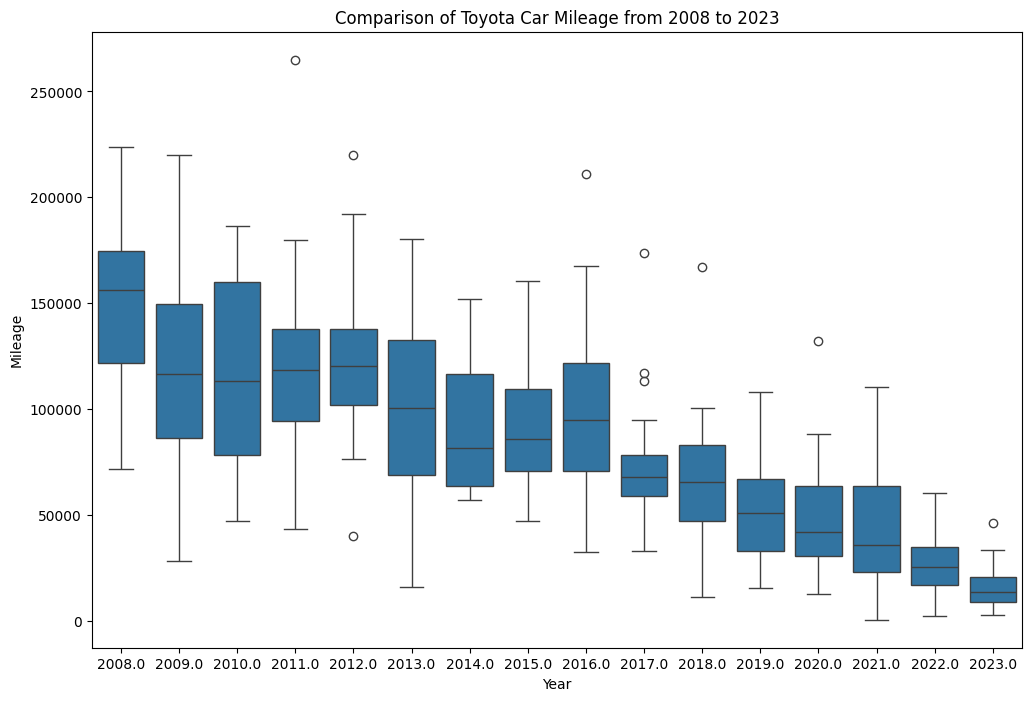

In [145]:
# x-axis label was overlapping
plt.figure(figsize=(12, 8))

sns.boxplot(data=filtered_mileage, x='Year', y='Mileage')

plt.title('Comparison of Toyota Car Mileage from 2008 to 2023')
plt.xlabel('Year')
plt.ylabel('Mileage')

### Toyota Car Model's Price Comparison

This visualization's aim was to compare the different models of Toyota cars to see which model tends to be priced higher and/or lower in comparison to other models. While there was limited data for the Highlander, overall, it is considered the more expensive purchase throughout multiple years. Then, decreasing in price would be the Rav4, Camry, and Corolla.

Although something interesting to note is that many of the older cars are priced within the same range while the newer cars have more distinct range of prices.

In [146]:
filtered_price = df_cars_cleaned[df_cars_cleaned['Price'].notnull()]

There were some cars that were missing the price, they were filtered out.

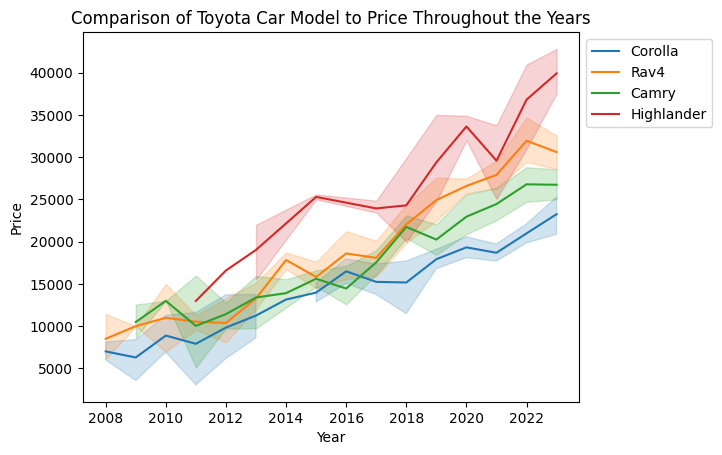

In [147]:
sns.lineplot(data=filtered_price, x='Year', y='Price', hue='Car Model')

plt.title('Comparison of Toyota Car Model to Price Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Price')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Toyota Car Models throughout the Year

This visualization showcases how many entries of car models there are from 2008 to 2023 with a large count for the Rav4 in 2021. Another interesting thing to note is that the Corolla entries seem to cycle every few years with 2008, 2015, and 2021/2022 having a spike in entries with roughly 15 cars per year while the other years only have 5-10 entries per year.

Text(0.5, 1.0, 'Count of Car Models from 2008 to 2023')

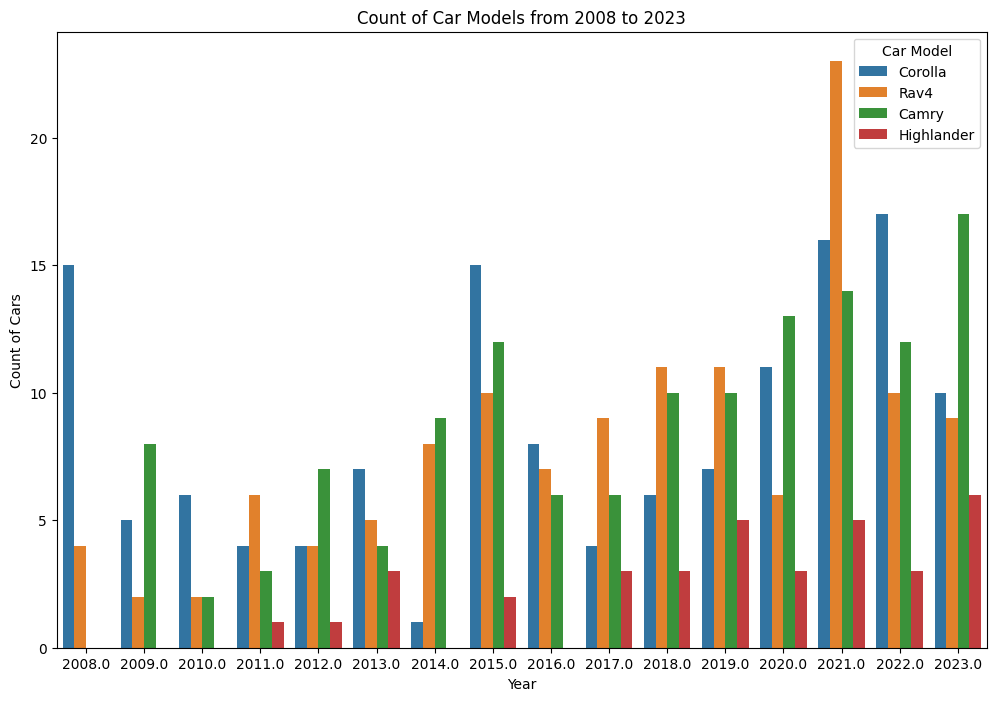

In [148]:
# x-axis label was overlapping
plt.figure(figsize=(12, 8))

sns.countplot(data=df_cars_cleaned, x='Year', hue='Car Model')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Cars')
plt.title('Count of Car Models from 2008 to 2023')

# Part 3: Question

> "Can we predict the selling price of used Toyota cars based on their characteristics such as model, year, mileage, and other features?"

The question is generally answerable as we have data on the model, year, mileage, and other features. With the second visualization, it showcases which models generally have a higher price range and also a rough price average based on the car models.

This question could be interesting for consumers who are looking into buying and/or selling used cars as customers usually have a budget and the automotive industry/resale market could price appropriately.

# Part 4: Reflection

Personally, I don't believe the data cleaning was efficient, but as a first time user, I believe I did a satisfactory job. I learned a lot especially while creating the visualizations as it can illustrate all the potential errors in the data such as duplication of entries, missing numbers, or inaccurate entries. If there were additional listings, it would be difficult to as I personally believed it required a lot of manual effort.

I don't think I explored the dataset enough as, for example, I would like to use the color entries to illustrate some visualization, but cleaning would've taken a while with my limited skillset.

For the question itself, while it is answerable, I think because it is not a binary answer and more of a predictive model, it is difficult to say that the answer is correct.